# Hub Segmentation: Test Script

Load in Pandas

In [1]:
import pandas as pd

Load in credentials

In [2]:
svv_credentials = open('svv_creds.json.txt').read()
import json
svv_creds = json.loads(svv_credentials)

Connect to SVV

In [3]:
import psycopg2

def get_svv_connection():
    con = psycopg2.connect(dbname = 'svv', host = 'svv-rs-prod-bi.cjddijbnvfpr.eu-west-1.redshift.amazonaws.com', \
                           port = 5439, user = svv_creds['user'], password = svv_creds['password'])
    return con

Query data from Sandbox tables and create DataFrames

In [4]:
query_data_1 = "Select TOP 100000 * from sandbox.rw_hub_segmentation_sub_genre_test"
query_data_2 = "Select TOP 100000 * from sandbox.rw_hub_segmentation_programme_test"
query_data_3 = "Select TOP 100000 * from sandbox.rw_hub_segmentation_consumption_test"

df_sub_genre = pd.DataFrame()

try:
    con = get_svv_connection()
    
    cur = con.cursor()
    cur.execute(query_data_1)
    
    colnames = [desc[0] for desc in cur.description]
    df_sub_genre = pd.DataFrame(cur.fetchall(), columns = colnames)
    
    cur.execute(query_data_2)
    
    colnames = [desc[0] for desc in cur.description]
    df_programme = pd.DataFrame(cur.fetchall(), columns = colnames) 
    
    cur.execute(query_data_3)
    
    colnames = [desc[0] for desc in cur.description]
    df_consumption = pd.DataFrame(cur.fetchall(), columns = colnames)
    
except Exception as inst:
    print(inst)
finally:
    cur.close()
    con.close()

In [5]:
df_sub_genre.head()

,viewer_id,short_subgenre,sub_genre_consumption
0,0000124d-43fc-40cf-ae8d-9cf22122e2f7,CRIME AND THRILLER,5.3180161111
1,00001792-bea4-5035-91b3-42dc21492832,COMEDY,1.4477777777
2,00004bef-a9e9-401f-b1f7-6c1400322a76,DATING SHOWS,9.4716927777
3,000061da-2686-4954-9ed4-29fa8a767d39,QUIZ AND GAME SHOW,0.7614222222
4,00009222-dbbc-4530-93de-8aab4113e901,FACTUAL REALITY,0.9095780555


In [6]:
df_programme.head()

,viewer_id,programme_title,programme_consumption
0,00002c59-aa39-44ca-97f3-5c498c98eb13,Emmerdale,0.3634188888
1,00004b10-565e-4fe1-9382-f2b9ae99c18f,Emmerdale,0E-10
2,00004bef-a9e9-401f-b1f7-6c1400322a76,Love Island,9.4716927777
3,00007609-c784-4ac3-ba85-242d7de959e8,Family Guy,7.5798669444
4,00008912-a0ab-4330-b165-43d8b71c23a9,Love Island,16.7788874999


In [7]:
df_consumption.head()

,viewer_id,total_consumption
0,00004bef-a9e9-401f-b1f7-6c1400322a76,9.4716927777
1,000065d8-a1e3-4bd7-af82-9d904a531264,2.5839661111
2,000098de-2794-4184-a734-c76f75a4a759,4.5365138888
3,0000a369-1313-426d-8d00-adc57386071a,3.2608724999
4,0000e405-08f0-47b9-8491-1c3912fae527,0.3653538888


Check and convert the necessary data types

In [8]:
df_sub_genre.dtypes

viewer_id                object
short_subgenre           object
sub_genre_consumption    object
dtype: object

In [9]:
df_programme.dtypes

viewer_id                object
programme_title          object
programme_consumption    object
dtype: object

In [10]:
df_consumption.dtypes

viewer_id            object
total_consumption    object
dtype: object

In [11]:
df_sub_genre['sub_genre_consumption'] = df_sub_genre['sub_genre_consumption'].astype(float)

In [12]:
df_programme['programme_consumption'] = df_programme['programme_consumption'].astype(float)

In [13]:
df_consumption['total_consumption'] = df_consumption['total_consumption'].astype(float)

Pivot the DataFrames to turn the Sub-Genre and Programme rows into columns

In [14]:
df_sub_genre_pivot = df_sub_genre.pivot_table(index = 'viewer_id', columns = 'short_subgenre', values = 'sub_genre_consumption').fillna(0)
df_sub_genre_pivot.head()

short_subgenre,ACTION AND ADVENTURE,ADULT ANIMATION,ARTS DOCUMENTARY,AWARD SHOWS,BASED ON A TRUE STORY,BIOGRAPHIES,BOXING,CELEBRITIES SHOW,CELEBRITY FACTUAL,CHAT AND MAGAZINE,...,ROMANTIC DRAMA,RUGBY,SITUATION COMEDY,SPORTS,SPORTS DOCUMENTARY,TALENT SHOW,TRAVEL AND ADVENTURE,VARIETY,WILDLIFE AND ENVIRONMENT,WRESTLING
viewer_id,,,,,,,,,,,,,,,,,,,,,
00000227-0232-4699-81f2-41fab58c2a48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
0000083d-371d-4c96-b0cb-d6d0a6e95246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
000009be-a967-468c-aac4-71e8e78a0d65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.991267,0.0,0.0,0.0,0.0
00000d7e-7e1b-412c-b121-eb6785807165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
00001132-91a4-5552-a5a0-6c39d0218644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [15]:
df_programme_pivot = df_programme.pivot_table(index = 'viewer_id', columns = 'programme_title', values = 'programme_consumption').fillna(0)
df_programme_pivot.head()

programme_title,American Dad!,Britain's Got Talent,Coronation Street,Emmerdale,Family Guy,Love Island,The Only Way is Essex,The Real Housewives of Cheshire
viewer_id,,,,,,,,
0000041e-7780-4709-9728-cdf607c9ca4c,0.000000,0.0,0.0000,0.0,0.0,3.496120,0.0,0.000000
00000d7e-7e1b-412c-b121-eb6785807165,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.724336
00000ebe-2560-54c3-9838-c8ada8099dee,0.000000,0.0,0.3675,0.0,0.0,0.000000,0.0,0.000000
00001792-bea4-5035-91b3-42dc21492832,3.687222,0.0,0.0000,0.0,0.0,0.000000,0.0,0.000000
000017ac-e6cc-4a1d-9a56-c24a3a81df33,0.000000,0.0,0.0000,0.0,0.0,0.810396,0.0,0.000000


Merge the 3 DataFrames into 1

In [16]:
df_merged = df_sub_genre_pivot.merge(df_programme_pivot, how = 'inner', on = 'viewer_id')
df_merged.head()

,ACTION AND ADVENTURE,ADULT ANIMATION,ARTS DOCUMENTARY,AWARD SHOWS,BASED ON A TRUE STORY,BIOGRAPHIES,BOXING,CELEBRITIES SHOW,CELEBRITY FACTUAL,CHAT AND MAGAZINE,...,WILDLIFE AND ENVIRONMENT,WRESTLING,American Dad!,Britain's Got Talent,Coronation Street,Emmerdale,Family Guy,Love Island,The Only Way is Essex,The Real Housewives of Cheshire
viewer_id,,,,,,,,,,,,,,,,,,,,,
00000d7e-7e1b-412c-b121-eb6785807165,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.724336
00001792-bea4-5035-91b3-42dc21492832,0.0,6.371389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.687222,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
000017ac-e6cc-4a1d-9a56-c24a3a81df33,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.810396,0.0,0.000000
00001b18-c069-4c2c-8baa-8f0065d2e540,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,14.415560,0.0,0.000000
00001f51-abb2-4447-bd9d-c249c8b312e9,0.0,3.262975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.518879,0.0,0.0,0.0,2.744096,0.000000,0.0,0.000000


In [17]:
df_final = df_merged.merge(df_consumption, how = 'inner', on = 'viewer_id')
df_final.head()

,viewer_id,ACTION AND ADVENTURE,ADULT ANIMATION,ARTS DOCUMENTARY,AWARD SHOWS,BASED ON A TRUE STORY,BIOGRAPHIES,BOXING,CELEBRITIES SHOW,CELEBRITY FACTUAL,...,WRESTLING,American Dad!,Britain's Got Talent,Coronation Street,Emmerdale,Family Guy,Love Island,The Only Way is Essex,The Real Housewives of Cheshire,total_consumption
0,00000d7e-7e1b-412c-b121-eb6785807165,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.724336,7.563277
1,0000449f-8bdf-4e5c-9009-0eadcfa5a869,0.0,0.0,0.0,0.000000,0.0,3.774892,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.730971,1.521894,0.0,1.541750,9.082530
2,00004a79-2a98-4701-b492-ab80ed015c42,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,8.164114,0.0,0.000000,8.164114
3,00004bef-a9e9-401f-b1f7-6c1400322a76,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,9.471693,0.0,0.000000,9.471693
4,000061da-2686-4954-9ed4-29fa8a767d39,0.0,0.0,0.0,1.493784,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.040828,0.0,0.0,0.000000,0.000000,0.0,0.000000,14.820746


Re-Order the columns of the final DataFrame - probably a better way of doing this

In [18]:
new_order = [[0,-1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59]]
df_final = df_final[df_final.columns[new_order]]
df_final.head()

C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\base.py:2095: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,viewer_id,total_consumption,ACTION AND ADVENTURE,ADULT ANIMATION,ARTS DOCUMENTARY,AWARD SHOWS,BASED ON A TRUE STORY,BIOGRAPHIES,BOXING,CELEBRITIES SHOW,...,WILDLIFE AND ENVIRONMENT,WRESTLING,American Dad!,Britain's Got Talent,Coronation Street,Emmerdale,Family Guy,Love Island,The Only Way is Essex,The Real Housewives of Cheshire
0,00000d7e-7e1b-412c-b121-eb6785807165,7.563277,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.724336
1,0000449f-8bdf-4e5c-9009-0eadcfa5a869,9.082530,0.0,0.0,0.0,0.000000,0.0,3.774892,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.730971,1.521894,0.0,1.541750
2,00004a79-2a98-4701-b492-ab80ed015c42,8.164114,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,8.164114,0.0,0.000000
3,00004bef-a9e9-401f-b1f7-6c1400322a76,9.471693,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,9.471693,0.0,0.000000
4,000061da-2686-4954-9ed4-29fa8a767d39,14.820746,0.0,0.0,0.0,1.493784,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.040828,0.0,0.0,0.000000,0.000000,0.0,0.000000


Re-set the Index as Viewer_id

In [19]:
df_final.set_index('viewer_id', inplace = True)
df_final.head()

,total_consumption,ACTION AND ADVENTURE,ADULT ANIMATION,ARTS DOCUMENTARY,AWARD SHOWS,BASED ON A TRUE STORY,BIOGRAPHIES,BOXING,CELEBRITIES SHOW,CELEBRITY FACTUAL,...,WILDLIFE AND ENVIRONMENT,WRESTLING,American Dad!,Britain's Got Talent,Coronation Street,Emmerdale,Family Guy,Love Island,The Only Way is Essex,The Real Housewives of Cheshire
viewer_id,,,,,,,,,,,,,,,,,,,,,
00000d7e-7e1b-412c-b121-eb6785807165,7.563277,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.724336
0000449f-8bdf-4e5c-9009-0eadcfa5a869,9.082530,0.0,0.0,0.0,0.000000,0.0,3.774892,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.730971,1.521894,0.0,1.541750
00004a79-2a98-4701-b492-ab80ed015c42,8.164114,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,8.164114,0.0,0.000000
00004bef-a9e9-401f-b1f7-6c1400322a76,9.471693,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,9.471693,0.0,0.000000
000061da-2686-4954-9ed4-29fa8a767d39,14.820746,0.0,0.0,0.0,1.493784,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.040828,0.0,0.0,0.000000,0.000000,0.0,0.000000


Get rid of any duplicate columns

In [20]:
df_final = df_final.loc[:, ~df_final.columns.duplicated()]
df_final.head()

,total_consumption,ACTION AND ADVENTURE,ADULT ANIMATION,ARTS DOCUMENTARY,AWARD SHOWS,BASED ON A TRUE STORY,BIOGRAPHIES,BOXING,CELEBRITIES SHOW,CELEBRITY FACTUAL,...,WILDLIFE AND ENVIRONMENT,WRESTLING,American Dad!,Britain's Got Talent,Coronation Street,Emmerdale,Family Guy,Love Island,The Only Way is Essex,The Real Housewives of Cheshire
viewer_id,,,,,,,,,,,,,,,,,,,,,
00000d7e-7e1b-412c-b121-eb6785807165,7.563277,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.724336
0000449f-8bdf-4e5c-9009-0eadcfa5a869,9.082530,0.0,0.0,0.0,0.000000,0.0,3.774892,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.730971,1.521894,0.0,1.541750
00004a79-2a98-4701-b492-ab80ed015c42,8.164114,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,8.164114,0.0,0.000000
00004bef-a9e9-401f-b1f7-6c1400322a76,9.471693,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,9.471693,0.0,0.000000
000061da-2686-4954-9ed4-29fa8a767d39,14.820746,0.0,0.0,0.0,1.493784,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.040828,0.0,0.0,0.000000,0.000000,0.0,0.000000


Convert the Consumption into Proportions of Total Consumption - Probably a better way of doing this

In [21]:
df_final.columns

Index(['total_consumption', 'ACTION AND ADVENTURE', 'ADULT ANIMATION',
       'ARTS DOCUMENTARY', 'AWARD SHOWS', 'BASED ON A TRUE STORY',
       'BIOGRAPHIES', 'BOXING', 'CELEBRITIES SHOW', 'CELEBRITY FACTUAL',
       'CHAT AND MAGAZINE', 'CHAT AND MAGAZINE BIOGRAPHIES', 'CHILDREN',
       'CHILDREN FILM', 'CHILDREN QUIZ AND GAME SHOWS', 'CHILDRENS COMEDY',
       'CLIP SHOWS', 'COMEDY', 'COMEDY DRAMA', 'CRIME AND THRILLER',
       'CRIME DOCUMENTARY', 'CURRENT AFFAIRS', 'CURRENT AFFAIRS BUSINESS',
       'CURRENT AFFAIRS DOCUMENTARY', 'CURRENT AFFAIRS NEWS',
       'CURRENT AFFAIRS POLITICS', 'CYCLING', 'DATING SHOWS', 'DRAMA',
       'DRAMA DOCUMENTARY', 'FACTUAL PETS AND ANIMALS', 'FACTUAL REALITY',
       'FACTUAL SCIENCE AND TECHNOLOGY', 'FACTUAL WELLBEING', 'FOOTBALL',
       'HORROR', 'HORSE RACING', 'LONG-RUNNING DRAMA', 'MOTOR SPORTS',
       'MUSICAL SHOW', 'PERIOD AND HISTORICAL', 'QUIZ AND GAME SHOW',
       'ROMANTIC DRAMA', 'RUGBY', 'SITUATION COMEDY', 'SPORTS',
       'S

In [25]:
df_final[['ACTION AND ADVENTURE', 'ADULT ANIMATION', 'ARTS DOCUMENTARY', 'AWARD SHOWS', 'BASED ON A TRUE STORY',
          'BIOGRAPHIES', 'BOXING', 'CELEBRITIES SHOW', 'CELEBRITY FACTUAL', 'CHAT AND MAGAZINE', 
          'CHAT AND MAGAZINE BIOGRAPHIES', 'CHILDREN', 'CHILDREN FILM', 'CHILDREN QUIZ AND GAME SHOWS', 'CHILDRENS COMEDY', 
          'CLIP SHOWS', 'COMEDY', 'COMEDY DRAMA', 'CRIME AND THRILLER', 'CRIME DOCUMENTARY', 'CURRENT AFFAIRS', 
          'CURRENT AFFAIRS BUSINESS', 'CURRENT AFFAIRS DOCUMENTARY', 'CURRENT AFFAIRS NEWS', 'CURRENT AFFAIRS POLITICS',
          'CYCLING', 'DATING SHOWS', 'DRAMA', 'DRAMA DOCUMENTARY', 'FACTUAL PETS AND ANIMALS', 'FACTUAL REALITY', 
          'FACTUAL SCIENCE AND TECHNOLOGY', 'FACTUAL WELLBEING', 'FOOTBALL', 'HORROR', 'HORSE RACING', 'LONG-RUNNING DRAMA',
          'MOTOR SPORTS', 'MUSICAL SHOW', 'PERIOD AND HISTORICAL', 'QUIZ AND GAME SHOW', 'ROMANTIC DRAMA', 'RUGBY', 
          'SITUATION COMEDY', 'SPORTS', 'SPORTS DOCUMENTARY', 'TALENT SHOW', 'TRAVEL AND ADVENTURE', 'VARIETY', 
          'WILDLIFE AND ENVIRONMENT', 'WRESTLING', 'American Dad!', "Britain's Got Talent", 'Coronation Street', 'Emmerdale',
          'Family Guy', 'Love Island', 'The Only Way is Essex', 'The Real Housewives of Cheshire']] = df_final[['ACTION AND ADVENTURE', 'ADULT ANIMATION', 
                                                                'ARTS DOCUMENTARY', 'AWARD SHOWS', 'BASED ON A TRUE STORY',
          'BIOGRAPHIES', 'BOXING', 'CELEBRITIES SHOW', 'CELEBRITY FACTUAL', 'CHAT AND MAGAZINE', 
          'CHAT AND MAGAZINE BIOGRAPHIES', 'CHILDREN', 'CHILDREN FILM', 'CHILDREN QUIZ AND GAME SHOWS', 'CHILDRENS COMEDY', 
          'CLIP SHOWS', 'COMEDY', 'COMEDY DRAMA', 'CRIME AND THRILLER', 'CRIME DOCUMENTARY', 'CURRENT AFFAIRS', 
          'CURRENT AFFAIRS BUSINESS', 'CURRENT AFFAIRS DOCUMENTARY', 'CURRENT AFFAIRS NEWS', 'CURRENT AFFAIRS POLITICS',
          'CYCLING', 'DATING SHOWS', 'DRAMA', 'DRAMA DOCUMENTARY', 'FACTUAL PETS AND ANIMALS', 'FACTUAL REALITY', 
          'FACTUAL SCIENCE AND TECHNOLOGY', 'FACTUAL WELLBEING', 'FOOTBALL', 'HORROR', 'HORSE RACING', 'LONG-RUNNING DRAMA',
          'MOTOR SPORTS', 'MUSICAL SHOW', 'PERIOD AND HISTORICAL', 'QUIZ AND GAME SHOW', 'ROMANTIC DRAMA', 'RUGBY', 
          'SITUATION COMEDY', 'SPORTS', 'SPORTS DOCUMENTARY', 'TALENT SHOW', 'TRAVEL AND ADVENTURE', 'VARIETY', 
          'WILDLIFE AND ENVIRONMENT', 'WRESTLING', 'American Dad!', "Britain's Got Talent", 'Coronation Street', 'Emmerdale',
          'Family Guy', 'Love Island', 'The Only Way is Essex', 'The Real Housewives of Cheshire']].div(df_final['total_consumption'].values, axis = 0)
df_final.head()

,total_consumption,ACTION AND ADVENTURE,ADULT ANIMATION,ARTS DOCUMENTARY,AWARD SHOWS,BASED ON A TRUE STORY,BIOGRAPHIES,BOXING,CELEBRITIES SHOW,CELEBRITY FACTUAL,...,WILDLIFE AND ENVIRONMENT,WRESTLING,American Dad!,Britain's Got Talent,Coronation Street,Emmerdale,Family Guy,Love Island,The Only Way is Essex,The Real Housewives of Cheshire
viewer_id,,,,,,,,,,,,,,,,,,,,,
00000d7e-7e1b-412c-b121-eb6785807165,7.563277,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.095770
0000449f-8bdf-4e5c-9009-0eadcfa5a869,9.082530,0.0,0.0,0.0,0.00000,0.0,0.415621,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.190583,0.167563,0.0,0.169749
00004a79-2a98-4701-b492-ab80ed015c42,8.164114,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000
00004bef-a9e9-401f-b1f7-6c1400322a76,9.471693,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000
000061da-2686-4954-9ed4-29fa8a767d39,14.820746,0.0,0.0,0.0,0.10079,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.070228,0.0,0.0,0.000000,0.000000,0.0,0.000000


Pickle the DataFrame to store it rather than having to requery every time - this could be moved lower down the notebook

In [26]:
pd.to_pickle(df_final ,"./hub_segmentation_df_final.pkl")

Use PCA to Reduce the Dimensionality of the DataFrame

In [27]:
from sklearn.decomposition import PCA

In [28]:
df_final_reduced = df_final.drop(columns = ['total_consumption'])
df_final_reduced.head()

,ACTION AND ADVENTURE,ADULT ANIMATION,ARTS DOCUMENTARY,AWARD SHOWS,BASED ON A TRUE STORY,BIOGRAPHIES,BOXING,CELEBRITIES SHOW,CELEBRITY FACTUAL,CHAT AND MAGAZINE,...,WILDLIFE AND ENVIRONMENT,WRESTLING,American Dad!,Britain's Got Talent,Coronation Street,Emmerdale,Family Guy,Love Island,The Only Way is Essex,The Real Housewives of Cheshire
viewer_id,,,,,,,,,,,,,,,,,,,,,
00000d7e-7e1b-412c-b121-eb6785807165,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.095770
0000449f-8bdf-4e5c-9009-0eadcfa5a869,0.0,0.0,0.0,0.00000,0.0,0.415621,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.190583,0.167563,0.0,0.169749
00004a79-2a98-4701-b492-ab80ed015c42,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000
00004bef-a9e9-401f-b1f7-6c1400322a76,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000
000061da-2686-4954-9ed4-29fa8a767d39,0.0,0.0,0.0,0.10079,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.070228,0.0,0.0,0.000000,0.000000,0.0,0.000000


In [29]:
pca = PCA()
df_final_reduced_pca = pca.fit_transform(df_final_reduced)
df_final_reduced_pca

array([[-1.44766528e-02, -4.52304785e-02,  6.49947104e-01, ...,
         1.32122858e-06, -8.26034881e-18, -7.70992554e-19],
       [ 5.13008313e-01, -2.91332970e-01, -6.48785124e-02, ...,
        -5.48007098e-06, -4.31335820e-17, -6.52724495e-18],
       [-7.44278065e-01,  6.54560302e-02, -1.98439684e-02, ...,
        -2.81285242e-07, -2.19940772e-18,  7.89847794e-19],
       ...,
       [ 6.22773861e-01, -2.44648804e-01,  4.22808064e-02, ...,
         3.05924300e-06, -9.06788169e-18,  1.08960245e-18],
       [-7.44278065e-01,  6.54560302e-02, -1.98439684e-02, ...,
        -2.81285242e-07,  1.80930200e-18,  1.25740399e-18],
       [ 2.32254500e-01, -1.71943759e-01,  5.04780455e-02, ...,
         1.94836665e-06, -7.89851200e-18,  1.34455334e-18]])

In [30]:
from numpy import eye, asarray, dot, sum, diag
from numpy.linalg import svd

def varimax(X, gamma = 1.0, q = 20, tol = 1e-6):
    p, k = X.shape
    R = eye(k)
    d = 0
    for i in range(q):
        d_old = d
        Lambda = dot(X, R)
        u, s, vh, = svd(dot(X.T, asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T, Lambda))))))
        ##u, s, vh = svd(X.T * (asarray(Lambda)**3 - (gamma/p) * Lambda * (diag(Lambda.T * Lambda.T)).T).T)    
        R = dot(u, vh)
        d = sum(s)
        if d_old != 0 and d/d_old < 1 + tol: break
    return dot(X, R)    

In [31]:
varimax(df_final_reduced_pca)

array([[ 9.26548462e-02, -7.01901589e-02,  6.43167363e-01, ...,
         4.51139682e-06, -2.57308267e-18, -2.54897369e-19],
       [ 3.45819298e-01,  1.05970138e-01, -1.22066583e-01, ...,
        -1.83696533e-06, -5.07830740e-17, -6.54711150e-18],
       [-3.84923070e-01, -3.46049778e-01,  1.84801523e-02, ...,
        -1.21280398e-06, -6.57935272e-18,  7.29941605e-19],
       ...,
       [ 5.01237156e-01,  1.30575413e-01, -8.63894719e-03, ...,
         9.42242251e-06,  4.74615886e-18,  3.15731105e-19],
       [-3.84923070e-01, -3.46049778e-01,  1.84801523e-02, ...,
        -1.21280398e-06, -2.57437960e-18,  1.22849222e-18],
       [ 2.78615286e-01,  1.76558799e-02,  2.27002862e-02, ...,
         7.37772556e-06,  3.17314422e-18,  3.51850255e-19]])

In [32]:
df_final_reduced_pca = pd.DataFrame(df_final_reduced_pca)
df_final_reduced_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,-0.014477,-0.045230,0.649947,0.018351,-0.023732,-0.131308,0.063282,-0.031341,0.006006,-0.016557,...,-0.000044,0.000059,-0.000005,-9.224373e-06,0.000005,-2.810870e-06,-1.790745e-06,1.321229e-06,-8.260349e-18,-7.709926e-19
1,0.513008,-0.291333,-0.064879,0.000813,-0.108608,-0.095479,0.137260,0.002990,-0.140467,-0.024788,...,0.000096,-0.000010,-0.000055,9.332013e-07,0.000012,7.030025e-07,2.339959e-06,-5.480071e-06,-4.313358e-17,-6.527245e-18
2,-0.744278,0.065456,-0.019844,-0.000098,0.005943,0.021755,0.006628,0.010908,0.000249,0.004001,...,-0.000011,-0.000003,0.000001,-2.243652e-05,0.000003,1.362509e-06,8.432761e-07,-2.812852e-07,-2.199408e-18,7.898478e-19
3,-0.744278,0.065456,-0.019844,-0.000098,0.005943,0.021755,0.006628,0.010908,0.000249,0.004001,...,-0.000011,-0.000003,0.000001,-2.243652e-05,0.000003,1.362509e-06,8.432761e-07,-2.812852e-07,-2.117287e-17,-1.457450e-18
4,0.224561,-0.041637,0.440586,0.021879,0.059055,-0.040524,-0.011132,-0.101750,0.002787,-0.020698,...,-0.000041,0.000046,0.000019,-4.110254e-06,-0.000016,-5.606643e-06,-1.570295e-07,1.577011e-06,-5.122502e-18,5.306832e-19


Store the PCA object to be able to use it again in the future.

In [33]:
from sklearn.externals import joblib

joblib_file = "joblib_pca.pkl"
joblib.dump(pca, joblib_file)

##joblib_model = joblib.load(joblib_file)

['joblib_pca.pkl']

In [34]:
joblib_model = joblib.load(joblib_file)

Plot the Curve of % of Variance Explained by number of Components to find the optimal number

Text(0,0.5,'Explained Variance %')

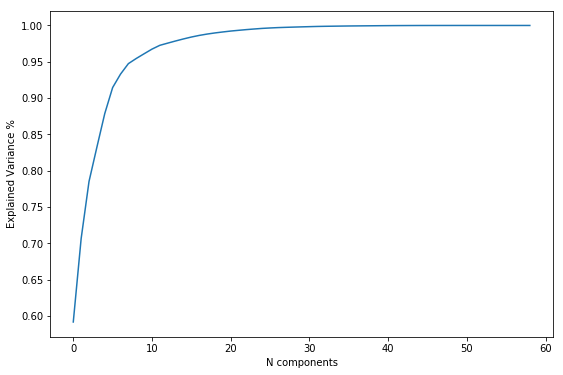

In [35]:
import matplotlib.pyplot as plt
% matplotlib inline

fig, ax = plt.subplots(figsize = (9,6))

ax.plot(pca.explained_variance_ratio_.cumsum())
ax.set_xlabel('N components')
ax.set_ylabel('Explained Variance %')

Calculate the Loadings of each Component: how much each variable contributes to each Component

In [36]:
import numpy as np

loadings_array = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings = pd.DataFrame(loadings_array.T)
loadings.columns = df_final_reduced.columns
loadings.index = loadings.index + 1
loadings.head(10).transpose()

,1,2,3,4,5,6,7,8,9,10
ACTION AND ADVENTURE,0.000004,-1.271732e-05,-3.445881e-05,-1.149827e-06,-1.784818e-06,-6.233271e-06,-6.569805e-06,-5.029033e-06,-1.206407e-06,-3.723528e-06
ADULT ANIMATION,0.023541,-3.667279e-02,9.749792e-03,1.922432e-03,-8.252608e-02,9.141361e-02,1.007359e-02,9.174855e-03,3.438228e-02,3.150037e-03
ARTS DOCUMENTARY,0.000006,-6.059761e-06,1.167073e-06,-1.454286e-07,-1.114014e-06,-6.729844e-06,-7.372081e-06,-6.523694e-06,-7.175375e-06,5.719902e-05
AWARD SHOWS,0.001172,-2.810520e-04,3.933070e-04,-3.258525e-04,-1.546604e-04,-7.961125e-04,-7.374614e-04,-8.187848e-05,-4.652657e-04,-5.085594e-04
BASED ON A TRUE STORY,0.000120,-1.253103e-04,-6.198225e-06,-6.290291e-06,-2.595489e-05,-1.176021e-04,-8.920393e-05,-9.592498e-05,-5.107900e-06,-6.107157e-05
BIOGRAPHIES,0.001864,-7.641911e-04,-1.915849e-04,1.157385e-04,-1.786852e-04,-1.364514e-03,-7.589350e-04,-4.312832e-04,-3.046920e-04,-9.653333e-04
BOXING,0.000002,-1.800458e-06,9.303249e-09,1.093689e-08,-3.695511e-07,-1.675236e-06,-1.337524e-06,-1.544854e-06,-7.088781e-08,-9.617350e-07
CELEBRITIES SHOW,0.000121,-1.526417e-04,-5.444269e-05,-2.448014e-05,-7.053665e-06,-1.263087e-04,-5.163454e-05,-5.149487e-05,1.649901e-05,-1.396000e-05
CELEBRITY FACTUAL,0.000135,-1.637981e-04,-1.911647e-05,2.105842e-05,-3.031299e-05,-1.928270e-04,1.858279e-05,-1.889237e-04,1.557125e-05,-6.697591e-05
CHAT AND MAGAZINE,0.003647,-2.643773e-03,9.222573e-05,-7.254360e-04,-1.497937e-04,-2.977192e-03,-2.604874e-03,-1.919905e-03,1.230101e-05,-1.651737e-03


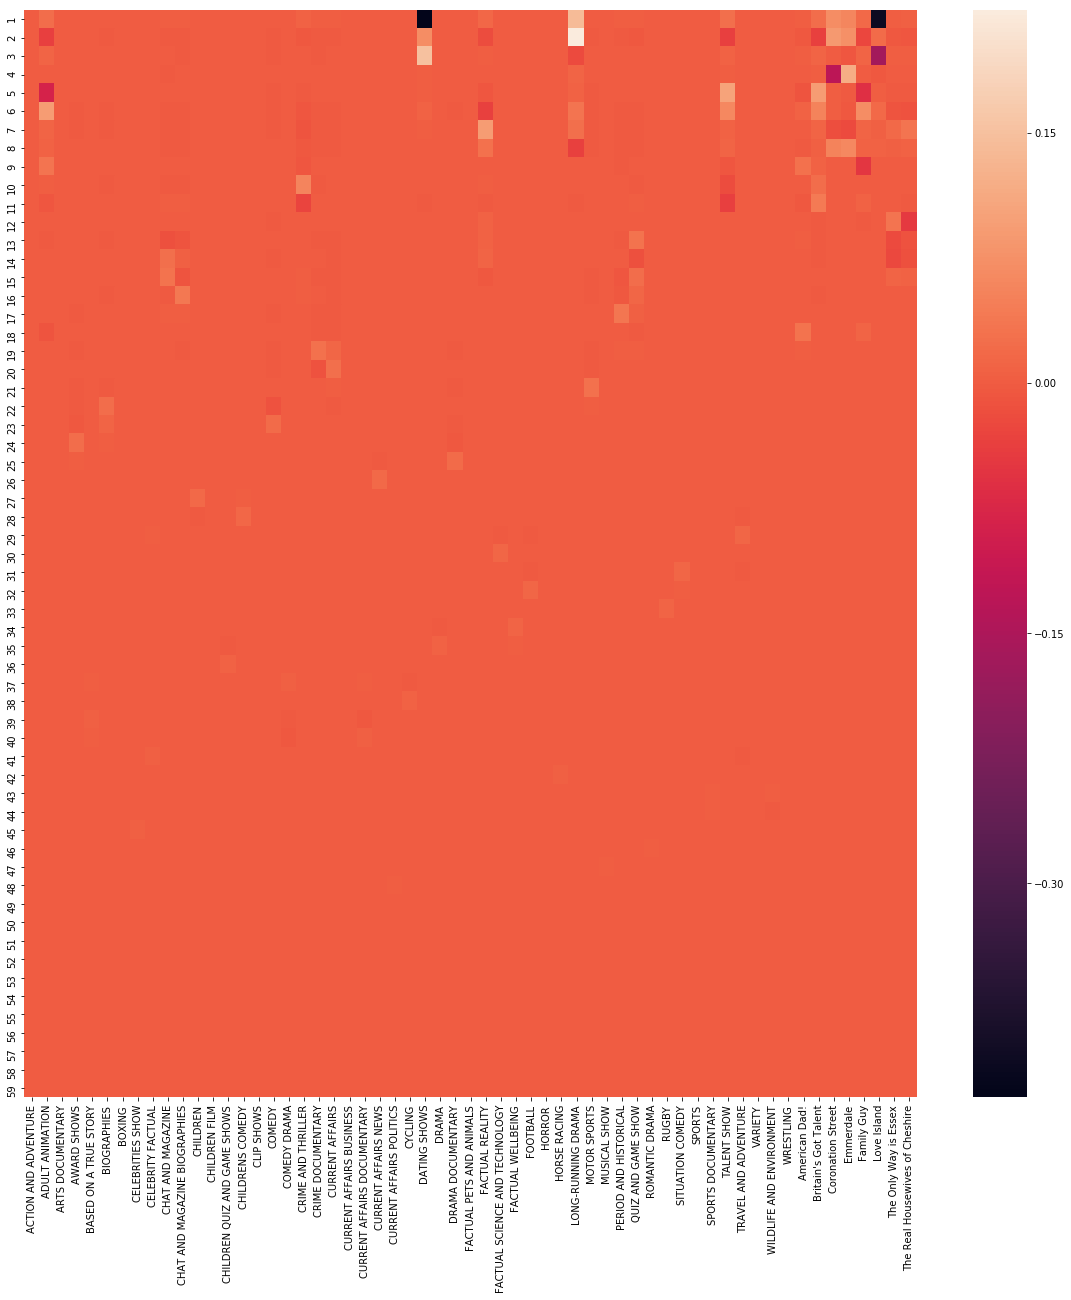

In [37]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(loadings, )
ax.set_label('component')

In [38]:
loadings_reduced = loadings.iloc[0:10,:]
loadings_reduced.head()

,ACTION AND ADVENTURE,ADULT ANIMATION,ARTS DOCUMENTARY,AWARD SHOWS,BASED ON A TRUE STORY,BIOGRAPHIES,BOXING,CELEBRITIES SHOW,CELEBRITY FACTUAL,CHAT AND MAGAZINE,...,WILDLIFE AND ENVIRONMENT,WRESTLING,American Dad!,Britain's Got Talent,Coronation Street,Emmerdale,Family Guy,Love Island,The Only Way is Essex,The Real Housewives of Cheshire
1,0.000004,0.023541,5.894020e-06,0.001172,0.000120,0.001864,1.715280e-06,0.000121,0.000135,0.003647,...,1.338439e-04,1.555394e-06,0.004010,0.024250,0.070560,0.059895,0.017309,-0.406348,0.003714,0.005726
2,-0.000013,-0.036673,-6.059761e-06,-0.000281,-0.000125,-0.000764,-1.800458e-06,-0.000153,-0.000164,-0.002644,...,-1.266850e-04,-1.757164e-06,-0.005350,-0.034507,0.087151,0.074373,-0.026458,0.020834,-0.004544,-0.006725
3,-0.000034,0.009750,1.167073e-06,0.000393,-0.000006,-0.000192,9.303249e-09,-0.000054,-0.000019,0.000092,...,7.698358e-07,-9.576459e-07,0.002023,0.012038,0.001073,-0.006405,0.010975,-0.164184,0.002510,0.003041
4,-0.000001,0.001922,-1.454286e-07,-0.000326,-0.000006,0.000116,1.093689e-08,-0.000024,0.000021,-0.000725,...,1.867036e-05,-3.915731e-07,0.000289,0.002736,-0.126316,0.118747,0.001693,-0.003508,-0.000146,0.000025
5,-0.000002,-0.082526,-1.114014e-06,-0.000155,-0.000026,-0.000179,-3.695511e-07,-0.000007,-0.000030,-0.000150,...,-5.061190e-05,-3.502987e-07,-0.008819,0.092187,0.002555,-0.000840,-0.061614,0.004005,-0.001338,-0.002086


In [55]:
col_names = list(loadings_reduced.columns)

In [39]:
df_varimax_loadings = pd.DataFrame(varimax(loadings_reduced.values))
df_varimax_loadings.columns = df_final_reduced.columns
df_varimax_loadings.head()

,ACTION AND ADVENTURE,ADULT ANIMATION,ARTS DOCUMENTARY,AWARD SHOWS,BASED ON A TRUE STORY,BIOGRAPHIES,BOXING,CELEBRITIES SHOW,CELEBRITY FACTUAL,CHAT AND MAGAZINE,...,WILDLIFE AND ENVIRONMENT,WRESTLING,American Dad!,Britain's Got Talent,Coronation Street,Emmerdale,Family Guy,Love Island,The Only Way is Essex,The Real Housewives of Cheshire
0,4.940395e-17,7.037634e-11,-1.215965e-17,-1.813754e-17,-4.025801e-17,3.801528e-18,5.381381e-17,-4.509176e-18,-3.342183e-18,1.397910e-17,...,-4.677515e-22,-3.944096e-22,6.634997e-18,-2.242114e-18,1.260202e-10,4.156531e-13,1.814505e-15,3.159918e-08,4.588100e-19,-1.068790e-18
1,-5.898488e-17,2.254707e-10,-4.556678e-17,-1.215673e-16,7.999286e-17,-1.159888e-17,-2.665746e-17,-1.315412e-17,-4.851748e-18,8.545391e-18,...,4.390665e-21,1.149116e-21,3.727263e-18,7.249450e-19,9.644533e-10,5.265798e-12,3.015579e-15,1.731660e-07,6.759131e-19,5.356786e-19
2,-4.682442e-16,-3.187419e-07,-1.207640e-16,-5.532397e-16,-5.658153e-16,9.785221e-16,-5.942693e-16,-4.099802e-17,-1.005230e-18,-1.465247e-17,...,-3.004707e-22,7.236367e-23,1.163256e-18,1.408572e-18,-3.686258e-07,-3.162956e-09,-1.750128e-11,-2.245243e-01,8.492118e-19,-9.637971e-19
3,-2.069815e-16,2.888757e-09,2.484651e-16,-1.303850e-16,-2.041257e-16,-7.417928e-16,1.755004e-15,-2.938688e-17,8.447414e-18,1.711827e-17,...,3.644347e-21,2.920174e-21,-4.127252e-18,4.258775e-18,-1.738361e-01,2.308355e-07,4.980545e-11,2.854056e-07,-5.327138e-19,2.446265e-19
4,-2.729430e-17,1.468499e-08,-1.176861e-15,-3.600508e-16,4.625431e-16,2.620654e-15,1.560326e-15,-5.342867e-17,1.175493e-18,9.559893e-18,...,4.682614e-22,-5.110261e-22,4.420051e-18,-3.223230e-18,3.250516e-09,3.070646e-09,2.700397e-10,-1.102869e-07,2.669043e-19,-2.562047e-20


In [40]:
loadings_array = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings = pd.DataFrame(loadings_array.T)
loadings.columns = df_final_reduced.columns
loadings.index = loadings.index + 1
loadings.head(10).transpose()

,1,2,3,4,5,6,7,8,9,10
ACTION AND ADVENTURE,0.000004,-1.271732e-05,-3.445881e-05,-1.149827e-06,-1.784818e-06,-6.233271e-06,-6.569805e-06,-5.029033e-06,-1.206407e-06,-3.723528e-06
ADULT ANIMATION,0.023541,-3.667279e-02,9.749792e-03,1.922432e-03,-8.252608e-02,9.141361e-02,1.007359e-02,9.174855e-03,3.438228e-02,3.150037e-03
ARTS DOCUMENTARY,0.000006,-6.059761e-06,1.167073e-06,-1.454286e-07,-1.114014e-06,-6.729844e-06,-7.372081e-06,-6.523694e-06,-7.175375e-06,5.719902e-05
AWARD SHOWS,0.001172,-2.810520e-04,3.933070e-04,-3.258525e-04,-1.546604e-04,-7.961125e-04,-7.374614e-04,-8.187848e-05,-4.652657e-04,-5.085594e-04
BASED ON A TRUE STORY,0.000120,-1.253103e-04,-6.198225e-06,-6.290291e-06,-2.595489e-05,-1.176021e-04,-8.920393e-05,-9.592498e-05,-5.107900e-06,-6.107157e-05
BIOGRAPHIES,0.001864,-7.641911e-04,-1.915849e-04,1.157385e-04,-1.786852e-04,-1.364514e-03,-7.589350e-04,-4.312832e-04,-3.046920e-04,-9.653333e-04
BOXING,0.000002,-1.800458e-06,9.303249e-09,1.093689e-08,-3.695511e-07,-1.675236e-06,-1.337524e-06,-1.544854e-06,-7.088781e-08,-9.617350e-07
CELEBRITIES SHOW,0.000121,-1.526417e-04,-5.444269e-05,-2.448014e-05,-7.053665e-06,-1.263087e-04,-5.163454e-05,-5.149487e-05,1.649901e-05,-1.396000e-05
CELEBRITY FACTUAL,0.000135,-1.637981e-04,-1.911647e-05,2.105842e-05,-3.031299e-05,-1.928270e-04,1.858279e-05,-1.889237e-04,1.557125e-05,-6.697591e-05
CHAT AND MAGAZINE,0.003647,-2.643773e-03,9.222573e-05,-7.254360e-04,-1.497937e-04,-2.977192e-03,-2.604874e-03,-1.919905e-03,1.230101e-05,-1.651737e-03


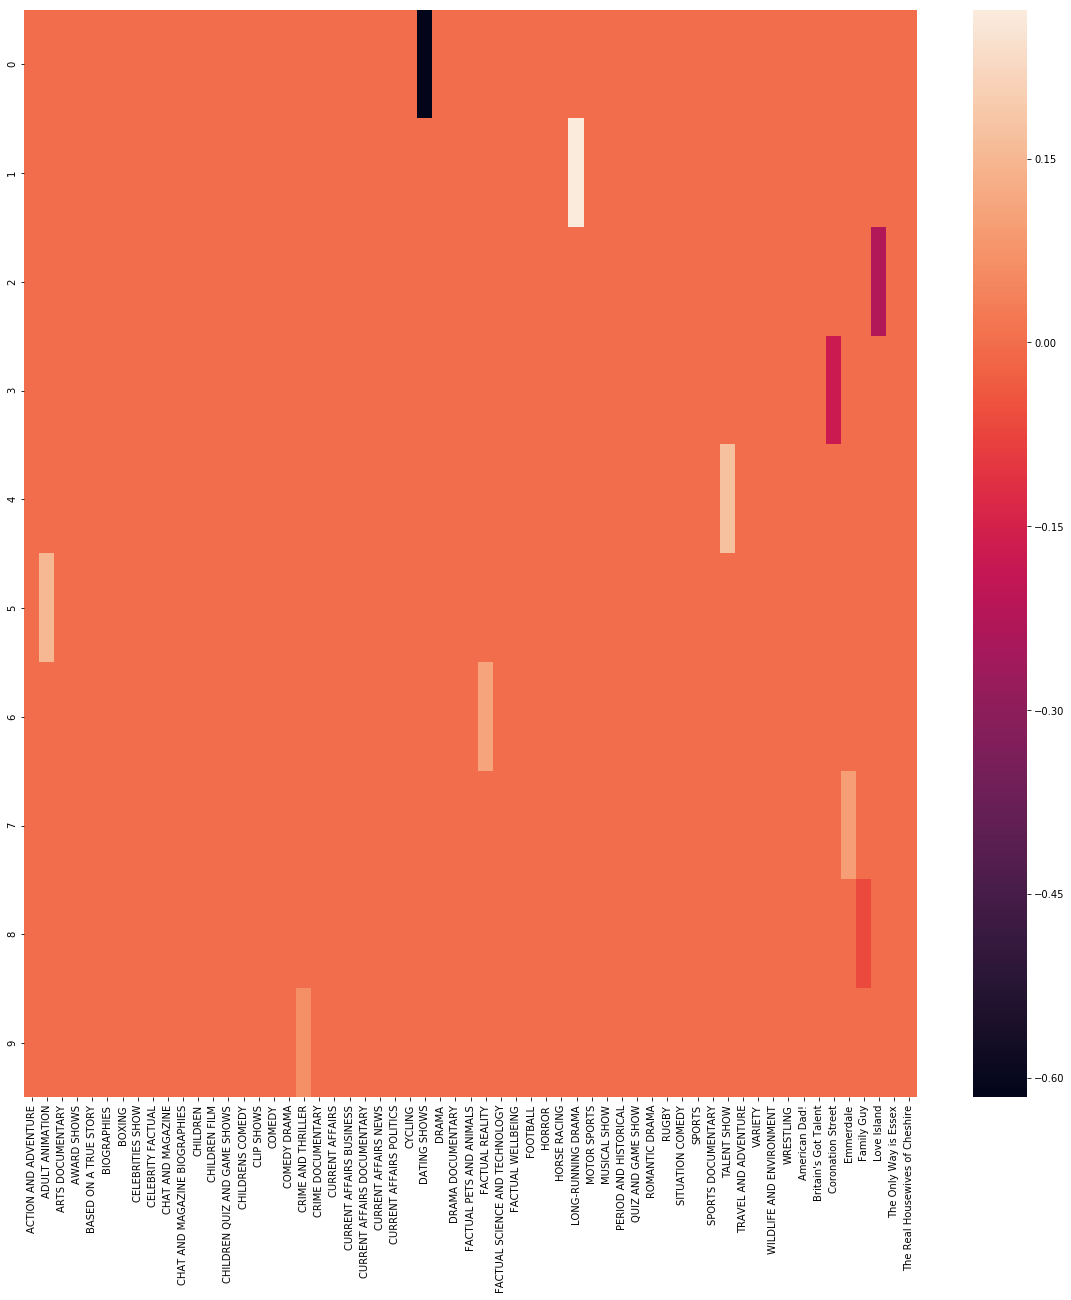

In [41]:
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(df_varimax_loadings, )
ax.set_label('component')

Export the Loadings DataFrame in order to interpret the Components

In [42]:
joblib_file_loadings = "joblib_loadings_reduced.pkl"
joblib.dump(loadings_reduced, joblib_file_loadings)

['joblib_loadings_reduced.pkl']

Keep only the optimal number of components

In [43]:
df_final_reduced_pca = df_final_reduced_pca.iloc[:,0:10]
df_final_reduced_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.014477,-0.045230,0.649947,0.018351,-0.023732,-0.131308,0.063282,-0.031341,0.006006,-0.016557
1,0.513008,-0.291333,-0.064879,0.000813,-0.108608,-0.095479,0.137260,0.002990,-0.140467,-0.024788
2,-0.744278,0.065456,-0.019844,-0.000098,0.005943,0.021755,0.006628,0.010908,0.000249,0.004001
3,-0.744278,0.065456,-0.019844,-0.000098,0.005943,0.021755,0.006628,0.010908,0.000249,0.004001
4,0.224561,-0.041637,0.440586,0.021879,0.059055,-0.040524,-0.011132,-0.101750,0.002787,-0.020698


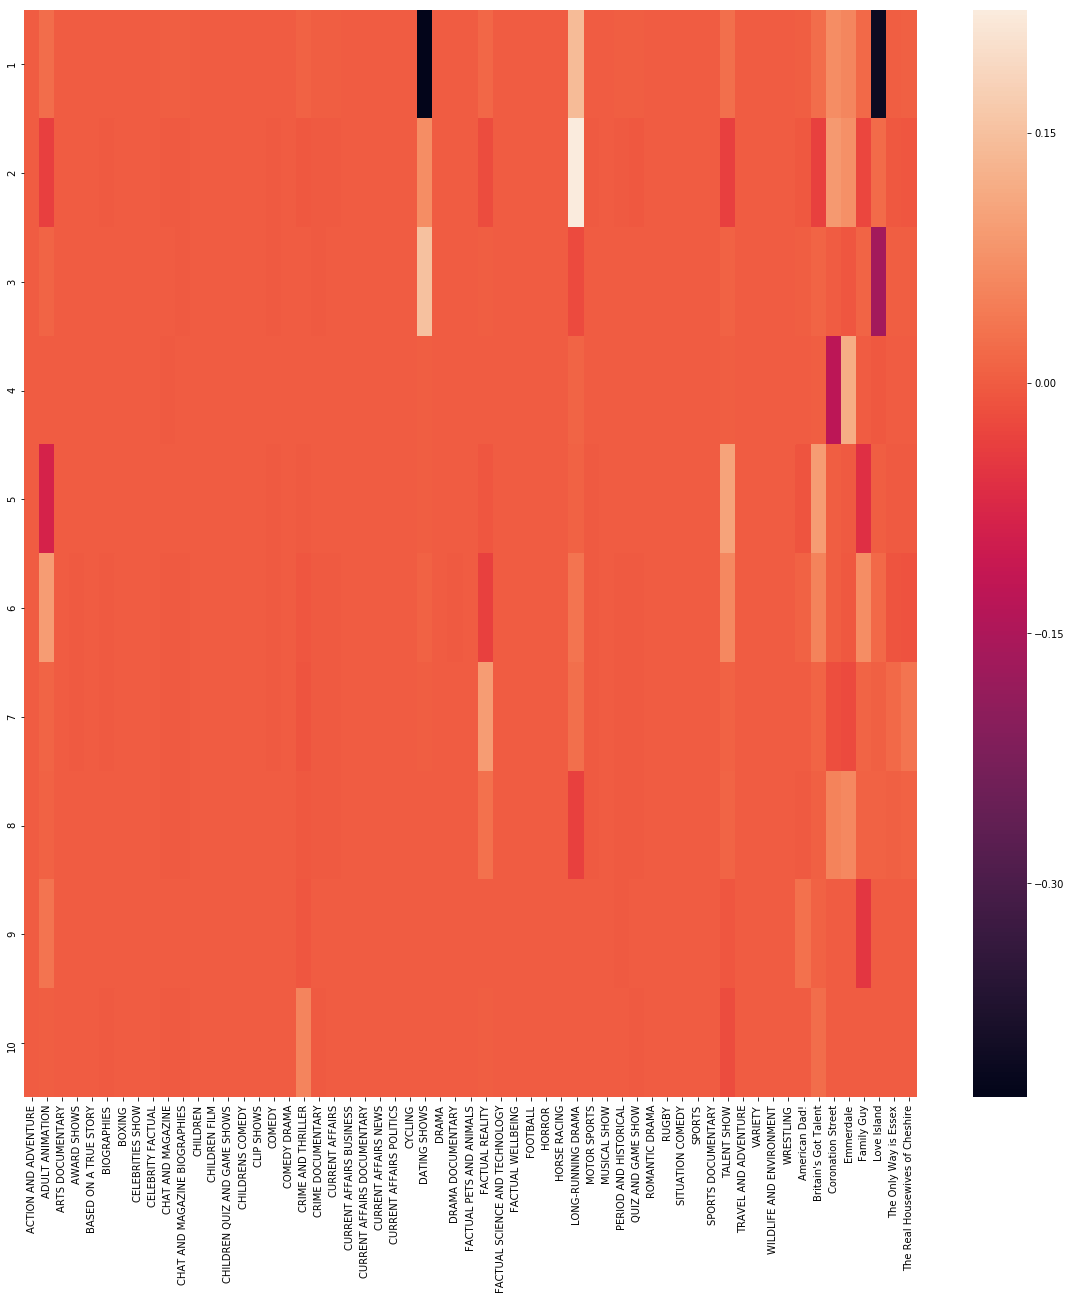

In [44]:
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(loadings_reduced, )
ax.set_label('component')

In [45]:
plt.savefig('reduced_heatmap.jpg')

<Figure size 432x288 with 0 Axes>

Cluster the optimal Components using K-means clustering

In [46]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_final_reduced_pca)
    Sum_of_squared_distances.append(km.inertia_)

Use the Elbow Curve to find the optimal number of Clusters k

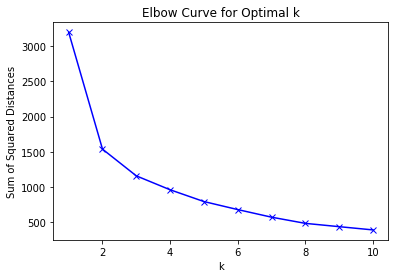

In [47]:
plt.plot(K, Sum_of_squared_distances, '-bx')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve for Optimal k')
plt.show()

Fit a K-Means Clustering algorithm with k defined from the above

In [48]:
kmeans = KMeans(n_clusters = 5)
kmeans = kmeans.fit(df_final_reduced_pca)
labels = kmeans.predict(df_final_reduced_pca)
centroids = kmeans.cluster_centers_

Store the KMeans object to be able to use later

In [49]:
joblib_file_k = "joblib_KMeans.pkl"
joblib.dump(KMeans, joblib_file_k)

##joblib_model_k = joblib.load(joblib_file)

['joblib_KMeans.pkl']

In [50]:
joblib_model_k = joblib.load(joblib_file)

In [51]:
print(centroids)

[[ 6.12943664e-01 -2.37061856e-01  4.70343072e-02 -4.44640345e-03
  -1.73986351e-03 -3.40366081e-03 -2.02490059e-03  2.25269289e-02
   1.82714748e-03  4.90477861e-03]
 [-6.87180946e-01  5.49095248e-02  3.34966817e-03  5.39155152e-04
   4.50023450e-03  1.52982345e-02  5.66521350e-03  7.52030225e-03
   4.76217815e-04  2.69403107e-03]
 [ 5.01967385e-02 -4.12373792e-02  3.22080563e-01  2.51059339e-03
  -1.19897630e-02 -5.40138803e-02 -1.75693952e-02 -3.03618013e-02
  -2.74226323e-03 -1.13211104e-02]
 [ 1.66109294e-01 -1.91195837e-01 -4.63075624e-01 -1.03922222e-02
  -1.17064111e-02 -3.88822423e-02 -2.23746380e-02 -2.05267470e-02
  -3.60060230e-03 -1.17654529e-02]
 [ 8.41756578e-01  6.05090324e-01 -5.25274083e-02  1.59610317e-02
   1.33044912e-02  5.40218582e-02  2.68053698e-02 -2.58259600e-02
   6.36549780e-04  3.24181832e-03]]


In [61]:
df_cluster_array = np.dot(centroids,loadings_reduced)
df_cluster_array

array([[ 3.54543391e-06,  2.36699170e-02,  5.26503064e-06,
         8.04398470e-04,  1.01262552e-04,  1.30545185e-03,
         1.44798489e-06,  1.07128606e-04,  1.16600998e-04,
         2.83419347e-03,  3.11850815e-03,  3.50137728e-04,
        -1.55007623e-20,  1.10059440e-04,  3.84099567e-04,
         2.98982573e-05,  1.20935452e-03,  2.07776379e-04,
         6.23612154e-03,  2.02756003e-03,  2.29774563e-03,
         2.69227948e-05,  2.46970331e-04,  4.20482466e-04,
         1.36248260e-05,  5.10337066e-05, -2.71959918e-01,
         1.99763975e-04,  5.37178964e-04,  1.07791920e-05,
         1.58003640e-02,  1.91983645e-04,  2.55632611e-04,
         3.12386416e-04,  5.93263843e-39,  6.66903150e-05,
         3.09130765e-02,  1.25794367e-03,  3.92520086e-05,
         2.33845434e-03,  3.06857898e-03,  1.70886375e-05,
         1.40020949e-04,  3.80585284e-04, -5.78398974e-06,
         5.33271007e-05,  2.54404559e-02,  4.01110536e-04,
         1.46840547e-05,  1.10893348e-04,  1.31096399e-0

In [62]:
df_cluster_interpretation = pd.DataFrame(data = df_cluster_array, columns = col_names)
df_cluster_interpretation

,ACTION AND ADVENTURE,ADULT ANIMATION,ARTS DOCUMENTARY,AWARD SHOWS,BASED ON A TRUE STORY,BIOGRAPHIES,BOXING,CELEBRITIES SHOW,CELEBRITY FACTUAL,CHAT AND MAGAZINE,...,WILDLIFE AND ENVIRONMENT,WRESTLING,American Dad!,Britain's Got Talent,Coronation Street,Emmerdale,Family Guy,Love Island,The Only Way is Essex,The Real Housewives of Cheshire
0,0.000004,0.023670,5.265031e-06,0.000804,0.000101,0.001305,1.447985e-06,0.000107,0.000117,0.002834,...,0.000111,1.310964e-06,0.003835,0.023480,0.024468,0.019701,0.017313,-0.261622,0.003570,0.005404
1,-0.000004,-0.016979,-4.427279e-06,-0.000839,-0.000093,-0.001355,-1.326644e-06,-0.000094,-0.000106,-0.002731,...,-0.000102,-1.210899e-06,-0.002961,-0.017103,-0.043379,-0.036761,-0.012456,0.280206,-0.002789,-0.004260
2,-0.000010,0.001305,9.978518e-07,0.000264,0.000021,0.000178,3.397747e-07,0.000004,0.000024,0.000605,...,0.000022,-9.821938e-09,0.000726,0.001846,-0.001638,-0.003076,0.002295,-0.075487,0.001188,0.001467
3,0.000020,0.003224,1.525155e-06,0.000128,0.000056,0.000637,7.674133e-07,0.000082,0.000074,0.001311,...,0.000054,1.165831e-06,0.000483,0.001177,-0.005060,-0.003150,0.000712,0.003559,0.000158,0.000465
4,-0.000003,0.001049,1.004353e-06,0.000726,0.000019,0.001030,2.595606e-07,0.000005,0.000010,0.001266,...,0.000030,1.847144e-07,0.000376,0.003339,0.108405,0.095245,0.000932,-0.319896,0.000146,0.000538


In [64]:
df_cluster_interpretation.to_csv('Hub Segmentation Cluster Interpretation.csv')

Append the cluster number to the final DataFrame

In [62]:
df_final_reduced['clusters'] = labels
df_final_reduced.head()

,ACTION AND ADVENTURE,ADULT ANIMATION,ARTS DOCUMENTARY,AWARD SHOWS,BASED ON A TRUE STORY,BIOGRAPHIES,BOXING,CELEBRITIES SHOW,CELEBRITY FACTUAL,CHAT AND MAGAZINE,...,WRESTLING,American Dad!,Britain's Got Talent,Coronation Street,Emmerdale,Family Guy,Love Island,The Only Way is Essex,The Real Housewives of Cheshire,clusters
viewer_id,,,,,,,,,,,,,,,,,,,,,
000006b0-7114-4528-8ba4-708ae763ec58,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.834020,0.0,0.0,1
0000345a-787b-4227-b591-50233c7caf7f,0.0,0.0,0.0,0.143341,0.0,0.204136,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.598363,0.0,0.0,4
00006e99-ad0e-4ba4-b1f4-c45432ce1394,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1
00007b23-89ce-451b-a034-1905c79f4f51,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1
00008c05-80f7-4292-b6e0-2a11a4277483,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.999234,0.0,0.0,1


Check the size of each cluster

In [64]:
counts = np.bincount(labels[labels >= 0])
print(counts)

[ 786 3028 1592  619  854]


Check how distinct each Cluster is, silhouette score between -1 and 1, 1 being perfectly distinct

In [65]:
from sklearn.metrics import silhouette_samples, silhouette_score

X = df_final_reduced.drop(['clusters'], axis = 1).values
Y = df_final_reduced['clusters'].values

silhouette_score(X, Y, sample_size = 10000, random_state = 11)

0.5235683818416764

Write back the DataFrame of the viewer_id and cluster into SVV

In [66]:
df_cluster = df_final_reduced.loc[:,['clusters']]
df_cluster.head()

,clusters
viewer_id,
000006b0-7114-4528-8ba4-708ae763ec58,1
0000345a-787b-4227-b591-50233c7caf7f,4
00006e99-ad0e-4ba4-b1f4-c45432ce1394,1
00007b23-89ce-451b-a034-1905c79f4f51,1
00008c05-80f7-4292-b6e0-2a11a4277483,1


In [98]:
df_cluster.head()

,clusters
viewer_id,
000006b0-7114-4528-8ba4-708ae763ec58,1
0000345a-787b-4227-b591-50233c7caf7f,4
00006e99-ad0e-4ba4-b1f4-c45432ce1394,1
00007b23-89ce-451b-a034-1905c79f4f51,1
00008c05-80f7-4292-b6e0-2a11a4277483,1


In [89]:
##from sklearn.cluster import DBSCAN

##dbsc = DBSCAN(eps = 0.1, min_samples = 100).fit(df_final_reduced)

##labels = dbsc.labels_
##core_samples = np.zeros_like(labels, dtype = bool)
##core_samples[dbsc.core_sample_indices_] = True

In [90]:
##n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
##print('Estimated Number of Clusters: %d' % n_clusters_)

Estimated Number of Clusters: 6


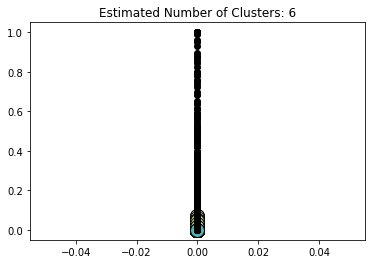

In [91]:
##unique_labels = set(labels)
##colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
##for k, col in zip(unique_labels, colors):
    ##if k == -1:
        ##col = 'k'
    
    ##class_member_mask = (labels == k)
    
    ##xy = X[class_member_mask & core_samples]
    ##plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 14)
    
    ##xy = X[class_member_mask & ~core_samples]
    ##plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 6)
    
##plt.title('Estimated Number of Clusters: %d' % n_clusters_)
##plt.show()

Load in S3 credentials

In [130]:
credentials = open('creds.json').read()

In [133]:
s3_creds = json.loads(credentials)

Import boto3 and io to upload final DataFrame to S3

In [138]:
import boto3
from io import StringIO

def df_to_s3(df, bucket, key, s3_access_key, s3_secret_key):

    session = boto3.Session(aws_access_key_id = s3_access_key,
                            aws_secret_access_key = s3_secret_key)
    s3 = session.resource('s3')
    csv_buffer = StringIO()
    df.to_csv(csv_buffer)

    s3.Object(bucket, key).put(ServerSideEncryption = 'AES256', Body = csv_buffer.getvalue()[1:])
    return print('Successfully uploaded data to s3 bucket!')

if __name__ == '__main__':

    file = ''
    bucket_name = 'svv-s3-dev-scratch'
    s3_access_key = s3_creds['access_key']
    s3_secret_key = s3_creds['secret_key']
    
    hub_segmentation_key = 'hub_segmentation_rw.csv'

    df_to_s3(df_cluster, bucket_name, hub_segmentation_key, s3_access_key, s3_secret_key)

SyntaxError: invalid syntax (<ipython-input-138-f4f4d2500062>, line 20)

Copy the DataFrame from S3 to Redshift

In [102]:
##import psycopg2

##def get_svv_connection():
    ##con = psycopg2.connect(dbname = 'svv', host = 'svv-rs-prod-bi.cjddijbnvfpr.eu-west-1.redshift.amazonaws.com', \
                           ##port = 5439, user = svv_creds['user'], password = svv_creds['password'])
    ##return con

In [117]:
##try:
    ##con = get_svv_connection()
    
    ##cur = con.cursor()
    
    ##sql = """COPY %s FROM '%s' credentials
    ##'aws_access_key_id = %s; aws_secret_access_key = %s' delimeter '%s';""" % 
    ##(sandbox.rw_hub_segmentation_test_clusters, 's3://svv-s3-dev-scratch/hub_segmentation_rw.csv', s3_access_key, s3_secret_key, ',')
    
    ##cur.execute(sql)
      
##except Exception as inst:
    ##print(inst)
##finally:
    ##cur.close()
    ##con.close()

SyntaxError: invalid syntax (<ipython-input-117-1282a2ab7eb1>, line 7)

In [ ]:
##DROP TABLE IF EXISTS sandbox.rw_hub_segmentation_test_clusters
COPY sandbox.rw_hub_segmentation_test_clusters
FROM 's3://svv-s3-dev-scratch/hub_segmentation_rw.csv'
ACCESS_KEY_ID creds['access_key']
SECRET_ACCESS_KEY creds['secret_key']
csv
ENCODING as UTF8
IGNOREHEADER AS 1;